In [1]:
"""We define the class for simulating the Rock-Paper-Scissors-Lizard-Spock model."""

import torch
import matplotlib.pyplot as plt
import math
from spectre.spectrum_general import matrix_solution
from spectre.spectrum_general import sim_solution
from spectre.spectrum_general import element_wise
from spectre.spectrum_general import recursive_solution
from spectre.model import RPS
import numpy as np

plt.rc("text", usetex=True)
plt.rc("font", family="serif")
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

fileloc = r"../figures/RPS/"

In [2]:
"""Defining the parametrs and the frequency tensor"""

# parameters
mu = 0.001
sigma_e = 1e-4

# frequency tensor
min_freq = 1e-3
max_freq = 10
n_freq_rat = 1000

freq_rat = torch.logspace(np.log10(min_freq), np.log10(max_freq), n_freq_rat)

In [3]:
mu = 0.01
sigma_e = 1e-2 / 5

# Define omega as a tensor (example range)
omega = 2 * math.pi * freq_rat

# Define the coefficients p0, p1, p2, p3
p0 = (15625 * mu**6 + 1250 * mu**5 + 575 * mu**4 + 28 * mu**3 + (79 * mu**2) / 25 - (6 * mu) / 125 + 1 / 625) * sigma_e**2
p1 = (1875 * mu**4 + 100 * mu**3 + 18 * mu**2 + (36 * mu) / 25 + 83 / 625) * sigma_e**2
p2 = (75 * mu**2 + 2 * mu - 1/5) * sigma_e**2
p3 = sigma_e**2

# Define the coefficients q0, q1, q2, q3, q4
q0 = 390625 * mu**8 + 12500 * mu**6 + 110 * mu**4 + (4 * mu**2) / 25 + 1 / 15625
q1 = 62500 * mu**6 + 500 * mu**4 + (28 * mu**2) / 5 - 4 / 625
q2 = 3750 * mu**4 - 20 * mu**2 + 22 / 125
q3 = 100 * mu**2 - 4 / 5
q4 = 1

# Define the numerator and denominator of S^22(omega)
numerator = p0 + p1 * omega**2 + p2 * omega**4 + p3 * omega**6
denominator = q0 + q1 * omega**2 + q2 * omega**4 + q3 * omega**6 + q4 * omega**8

# Define S^22(omega)
S_22 = numerator / denominator

In [4]:
# print all p and q 
print("p0: ", p0)
print("p1: ", p1)
print("p2: ", p2)
print("p3: ", p3)
print("q0: ", q0)
print("q1: ", q1)
print("q2: ", q2)
print("q3: ", q3)
print("q4: ", q4)


p0:  5.879562500000001e-09
p1:  5.96475e-07
p2:  -6.900000000000001e-07
p3:  4e-06
q0:  8.111253906249999e-05
q1:  -0.005834937500000001
q2:  0.17403749999999998
q3:  -0.79
q4:  1


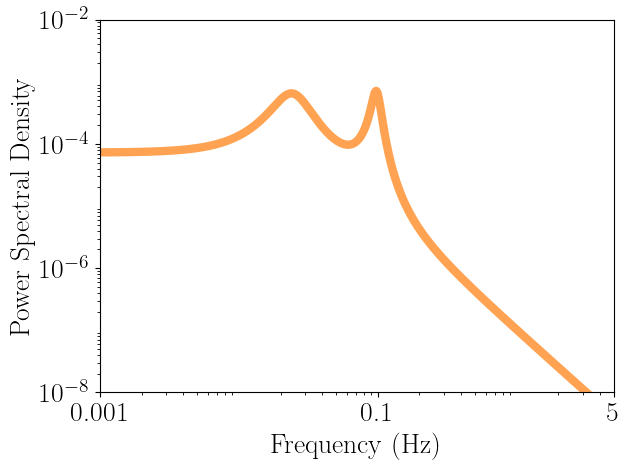

In [5]:
plt.figure(1)
plt.loglog(
    freq_rat,
    S_22,
    linewidth=6,
    color="#FFA353",
)
plt.xlabel("Frequency (Hz)", fontsize=20)
plt.ylabel("Power Spectral Density", fontsize=20)
plt.xticks([1e-3, 1e-1, 5], ["0.001", "0.1", "5"], fontsize=20)
plt.yticks([1e-8, 1e-6, 1e-4, 1e-2], fontsize=20)
plt.xlim([1e-3, 5])
plt.ylim([1e-8, 1e-2])
plt.tight_layout()
# plt.savefig(fileloc + "psd_rps.svg", format="svg", dpi=1200)
plt.show()

In [6]:
"Approximation for small frequencies"
# Define the numerator and denominator of S^22(omega)
numerator = p0 + p1 * omega**2 
denominator = q0 + q1 * omega**2 + q2 * omega**4

# Define S^22(omega)
S_22_small = numerator / denominator

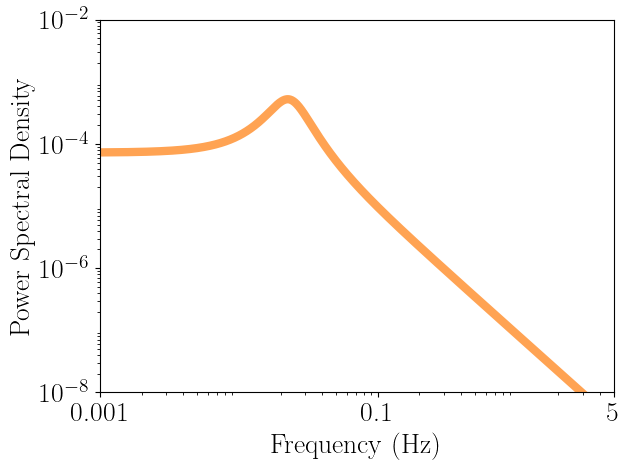

In [7]:
plt.figure(1)
plt.loglog(
    freq_rat,
    S_22_small,
    linewidth=6,
    color="#FFA353",
)
plt.xlabel("Frequency (Hz)", fontsize=20)
plt.ylabel("Power Spectral Density", fontsize=20)
plt.xticks([1e-3, 1e-1, 5], ["0.001", "0.1", "5"], fontsize=20)
plt.yticks([1e-8, 1e-6, 1e-4, 1e-2], fontsize=20)
plt.xlim([1e-3, 5])
plt.ylim([1e-8, 1e-2])
plt.tight_layout()
# plt.savefig(fileloc + "psd_rps.svg", format="svg", dpi=1200)
plt.show()

In [39]:
"Approximation for larger frequencies"
numerator = p0 + p2 * omega**4 + p3 * omega**6
denominator = q0 + q2 * omega**4 + q3 * omega**6 + q4 * omega**8

# Define S^22(omega)
S_22_large = abs(numerator / denominator)

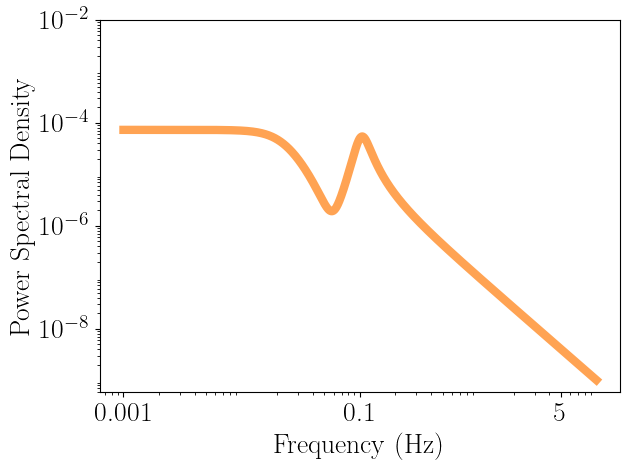

In [40]:
plt.figure(1)
plt.loglog(
    freq_rat,
    S_22_large,
    linewidth=6,
    color="#FFA353",
)
plt.xlabel("Frequency (Hz)", fontsize=20)
plt.ylabel("Power Spectral Density", fontsize=20)
plt.xticks([1e-3, 1e-1, 5], ["0.001", "0.1", "5"], fontsize=20)
plt.yticks([1e-8, 1e-6, 1e-4, 1e-2], fontsize=20)
# plt.xlim([1e-3, 5])
# plt.ylim([1e-8, 1e-2])
plt.tight_layout()
# plt.savefig(fileloc + "psd_rps.svg", format="svg", dpi=1200)
plt.show()

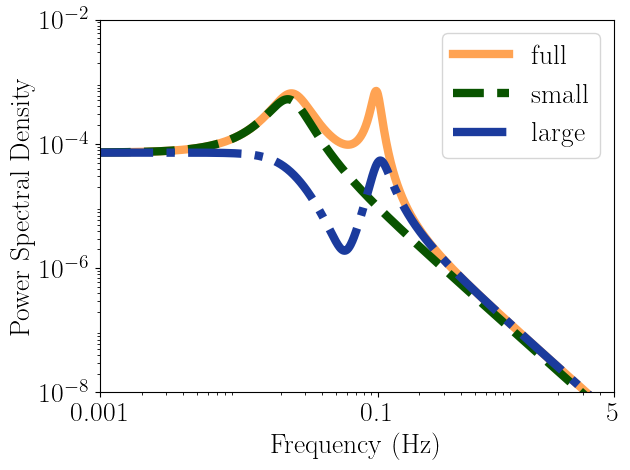

In [42]:
# plot S_22, S_22_small, S_22_large on the same plot
plt.figure(1)
plt.loglog(
    freq_rat,
    S_22,
    linewidth=6,
    color="#FFA353",
    label="full",
)
plt.loglog(
    freq_rat,
    S_22_small,
    linewidth=6,
    color="#095400",
    linestyle="--",
    label="small",
)
plt.loglog(
    freq_rat,
    S_22_large,
    linewidth=6,
    color="#1B3B9D",
    linestyle="-.",
    label="large",
)
plt.xlabel("Frequency (Hz)", fontsize=20)
plt.ylabel("Power Spectral Density", fontsize=20)
plt.xticks([1e-3, 1e-1, 5], ["0.001", "0.1", "5"], fontsize=20)
plt.yticks([1e-8, 1e-6, 1e-4, 1e-2], fontsize=20)
plt.xlim([1e-3, 5])
plt.ylim([1e-8, 1e-2])
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(fileloc + "decomposition.svg", format="svg", dpi=1200)
plt.show()